In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install geopandas matplotlib shapely

In [1]:
import matplotlib.pyplot as plt
import geopandas
import shapely

shapefile_ncr = '/kaggle/input/earth-observation-delhi-airshed/delhi_ncr_region.geojson'

delhi_ncr = geopandas.read_file(shapefile_ncr)

In [2]:
delhi_ncr.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [3]:
x_min, y_min, x_max, y_max = delhi_ncr.total_bounds
x_min, y_min, x_max, y_max
# this will output in degrees

(75.4733961824342, 26.70606227667623, 78.47747707541228, 29.99343911596307)

In [4]:
delhi_ncr_m = delhi_ncr.to_crs(epsg=32643)
delhi_ncr_wgs = delhi_ncr.to_crs(epsg=4326)

x_min, y_min, x_max, y_max = delhi_ncr_m.total_bounds
x_min, y_min, x_max, y_max

(546142.9999656422, 2956097.2599823284, 841674.2309820709, 3319945.580006641)

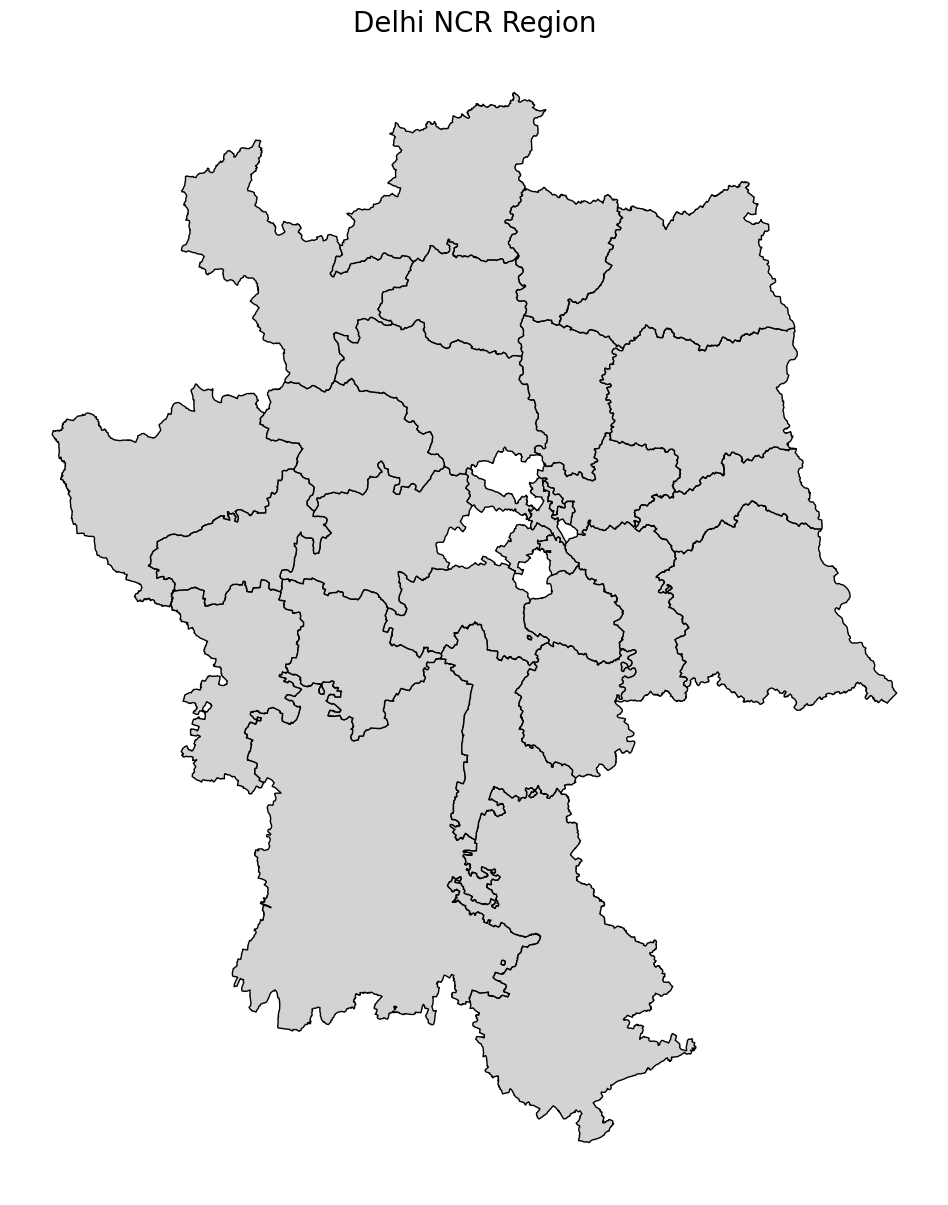

In [5]:
fig, axis = plt.subplots(figsize=(15, 15))
delhi_ncr.plot(ax=axis, color='lightgrey', edgecolor='black')
axis.set_title('Delhi NCR Region', fontsize=20)
plt.axis('off')
plt.show()

In [6]:
import numpy as np
# grid overlay

# grid size = 60km
grid_size = 60000

# divide x length into parts of 60km to get coordinates of 60km length on x axis
x_coordinates = np.arange(x_min, x_max, grid_size)
print(x_coordinates.shape)

#similarly for y axis
y_coordinates = np.arange(y_min, y_max, grid_size)
print(y_coordinates.shape)

(5,)
(7,)


In [7]:
from shapely import box

grid_cells = []

for x in x_coordinates:
    for y in y_coordinates:
        cell = box(x, y, x+grid_size, y+grid_size)
        grid_cells.append(cell)

grid_geo_df = geopandas.GeoDataFrame({'geometry': grid_cells}, crs=delhi_ncr_m.crs)

In [8]:
!pip install leafmap 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.1/568.1 kB 8.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 75.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 69.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 837.4/837.4 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.8/206.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 4.2 MB/s eta 0:00:00


In [9]:
# basemap has crs wgs
delhi_ncr_wgs = delhi_ncr_m.to_crs(epsg=4326)
grid_geo_df_wgs = grid_geo_df.to_crs(epsg = 4326)

center_point = delhi_ncr_wgs.unary_union.centroid
center_lat_lon = [center_point.y, center_point.x]
center_lat_lon

[28.484853199713758, 76.96780799805482]

In [10]:
grid_geo_df_wgs.head(5)

,geometry
0,"POLYGON ((76.06718 26.72207, 76.07230 27.26369..."
1,"POLYGON ((76.07230 27.26369, 76.07757 27.80527..."
2,"POLYGON ((76.07757 27.80527, 76.08299 28.34681..."
3,"POLYGON ((76.08299 28.34681, 76.08856 28.88830..."
4,"POLYGON ((76.08856 28.88830, 76.09429 29.42974..."


In [11]:
from shapely.geometry import Point
corners, centers = [], []

for cell in grid_geo_df_wgs.geometry:
    bounding_values = cell.bounds
    x_min, y_min, x_max, y_max = bounding_values
    corners.extend([Point(x_min, y_min), Point(x_min, y_max), Point(x_max, y_min), Point(x_max, y_max)])

    center = cell.centroid
    centers.append(center)


# form geo df

corners_geo_df = geopandas.GeoDataFrame(geometry=corners, crs=grid_geo_df_wgs.crs)
centers_geo_df = geopandas.GeoDataFrame(geometry=centers, crs=grid_geo_df_wgs.crs)

corners_geo_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
import leafmap.foliumap as leafmap
from IPython.display import IFrame

corners_geo_df['lon'] = corners_geo_df.geometry.x
corners_geo_df['lat'] = corners_geo_df.geometry.y
centers_geo_df['lon'] = centers_geo_df.geometry.x
centers_geo_df['lat'] = centers_geo_df.geometry.y

leaf_map = leafmap.Map(center=center_lat_lon, zoom=10)
leaf_map.add_basemap('satellite')

# add layer of ncr shapeline first
leaf_map.add_gdf(delhi_ncr_wgs, layer_name='ncr shapefile', style={"color": "black", "fillOpacity": 0.1})
leaf_map.add_gdf(grid_geo_df_wgs, layer_name="60x60 km grid", style={"color": "red", "fillOpacity": 0})
leaf_map.add_points_from_xy(
    corners_geo_df,
    x="lon",
    y="lat",
    layer_name="Corners",
    color="blue",
    radius=6,
    popup=["lat", "lon"]
)
leaf_map.add_points_from_xy(
    centers_geo_df,
    x="lon",
    y="lat",
    layer_name="Centers",
    color="yellow",
    radius=6,
    popup=["lat", "lon"]
)

leaf_map.to_html("test_marker_map.html")
IFrame("test_marker_map.html", width=1000, height=600)

Basemap can only be one of the following: OpenStreetMap, ROADMAP, SATELLITE, TERRAIN, HYBRID, FWS NWI Wetlands, FWS NWI Wetlands Raster, NLCD 2021 CONUS Land Cover, NLCD 2019 CONUS Land Cover, NLCD 2016 CONUS Land Cover, NLCD 2013 CONUS Land Cover, NLCD 2011 CONUS Land Cover, NLCD 2008 CONUS Land Cover, NLCD 2006 CONUS Land Cover, NLCD 2004 CONUS Land Cover, NLCD 2001 CONUS Land Cover, USGS NAIP Imagery, USGS NAIP Imagery False Color, USGS NAIP Imagery NDVI, USGS Hydrography, USGS 3DEP Elevation, USGS 3DEP Elevation Index, ESA WorldCover 2020, ESA WorldCover 2020 S2 FCC, ESA WorldCover 2020 S2 TCC, ESA WorldCover 2021, ESA WorldCover 2021 S2 FCC, ESA WorldCover 2021 S2 TCC, USGS.Imagery, BaseMapDE.Color, BaseMapDE.Grey, BasemapAT.basemap, BasemapAT.grau, BasemapAT.highdpi, BasemapAT.orthofoto, BasemapAT.overlay, BasemapAT.surface, BasemapAT.terrain, CartoDB.DarkMatter, CartoDB.DarkMatterNoLabels, CartoDB.DarkMatterOnlyLabels, CartoDB.Positron, CartoDB.PositronNoLabels, CartoDB.Positron

In [13]:
import os

image_folder= '/kaggle/input/earth-observation-delhi-airshed/rgb'

image_files = [file for file in os.listdir(image_folder) if file.endswith('.png')]

img_data_geo = []

for file in image_files:
    lat, lon = file.replace('.png', '').split('_')
    lat, lon = float(lat), float(lon)
    img_data_geo.append({'geometry': Point(lon, lat), 'lat': lat, 'lon': lon, 'file': file})

img_geo_df = geopandas.GeoDataFrame(data=img_data_geo, crs=delhi_ncr_wgs.crs)
img_geo_df.head(5)

,geometry,lat,lon,file
0,POINT (77.52340 28.22660),28.2266,77.5234,28.2266_77.5234.png
1,POINT (77.28220 28.42660),28.4266,77.2822,28.4266_77.2822.png
2,POINT (77.20580 28.75910),28.7591,77.2058,28.7591_77.2058.png
3,POINT (77.39100 28.53550),28.5355,77.3910,28.5355_77.3910.png
4,POINT (77.02340 28.29430),28.2943,77.0234,28.2943_77.0234.png


In [14]:
# filtered images
filtered_geo_df = geopandas.sjoin(img_geo_df, grid_geo_df_wgs, how='inner', predicate='within')

filtered_geo_df.head(5)

,geometry,lat,lon,file,index_right
0,POINT (77.52340 28.22660),28.2266,77.5234,28.2266_77.5234.png,23
1,POINT (77.28220 28.42660),28.4266,77.2822,28.4266_77.2822.png,17
2,POINT (77.20580 28.75910),28.7591,77.2058,28.7591_77.2058.png,17
3,POINT (77.39100 28.53550),28.5355,77.3910,28.5355_77.3910.png,24
4,POINT (77.02340 28.29430),28.2943,77.0234,28.2943_77.0234.png,16


In [15]:
# images and filter images count

len(img_geo_df), len(filtered_geo_df)

(9216, 9216)

In [16]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 77.5 MB/s eta 0:00:00:00:0100:01


In [17]:
#import rasterio for working with raster file
import rasterio
from rasterio.windows import Window

land_cover_file = '/kaggle/input/earth-observation-delhi-airshed/worldcover_bbox_delhi_ncr_2021.tif'
raster = rasterio.open(land_cover_file)

raster.shape

(9600, 9602)

In [18]:
raster.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

In [19]:
patch_size = 128

output_folder = 'patches'
os.makedirs(output_folder, exist_ok=True)

In [20]:
img_geo_df.head()

,geometry,lat,lon,file
0,POINT (77.52340 28.22660),28.2266,77.5234,28.2266_77.5234.png
1,POINT (77.28220 28.42660),28.4266,77.2822,28.4266_77.2822.png
2,POINT (77.20580 28.75910),28.7591,77.2058,28.7591_77.2058.png
3,POINT (77.39100 28.53550),28.5355,77.3910,28.5355_77.3910.png
4,POINT (77.02340 28.29430),28.2943,77.0234,28.2943_77.0234.png


In [21]:
raster.index(77.5234, 28.2266)

(9280, 8081)

In [22]:
for idx, row in img_geo_df.iterrows():
    lat, lon = row['lat'], row['lon']

    row_center, col_center = raster.index(lon, lat)
    window = Window(col_center - (patch_size//2), row_center - (patch_size//2),patch_size,patch_size)
    patch = raster.read(1, window=window)
    np.save(os.path.join(output_folder, f"{row['file']}.npy"), patch)
    
    

In [23]:
# get mode of each patch

def get_mode_patchwise(patch_np):
    flat = patch_np.flatten()
    flat = flat[(flat > 0) & (flat < 255)]
    mode_patch = mode(flat, keepdims=False)
    return int(mode_patch.mode)

In [24]:
patch_files = [file for file in os.listdir(output_folder) if file.endswith('.npy')]
# patch_files

In [25]:
esa_class_mapping = {
    10: "Forest",
    20: "Shrubland",
    30: "Grassland",
    40: "Cropland",
    50: "Urban",
    60: "Barren",
    70: "Snow/Ice",
    80: "Water",
    90: "Wetland",
    95: "Mangroves",
    100: "Moss/Lichen"
}

## Feedback: Question 2

If there are mutliple modes returned then calculate scores based on texture. More detailed egde cases can be formed. More details about texture of each can be learnt and then the texture can be calculated. The **get_label_using_texture()** function returns the class with highest texture in case of multiple labels. Returning the one from the modes could create biasness so I think thats not appropriate.

In [26]:
from skimage.filters import rank
from skimage.morphology import disk
from skimage.util import img_as_ubyte


def compute_texture_metrics(patch_np):
    patch_uint8 = img_as_ubyte(patch_np.astype(np.uint8))  # ensure 0-255
    entropy = rank.entropy(patch_uint8, disk(3)).mean()
    std_dev = patch_uint8.std()
    return entropy, std_dev

def get_label_using_texture(classes, entropy, stddev):
    texture_scores = {}

    for class_id in classes:
        if class_id in [10, 50, 95]:  # Forest, Urban, Mangroves
            score = entropy + stddev
        elif class_id in [80, 70, 100]:  # Water, Snow/Ice, Moss/Lichen
            score = -entropy - stddev
        elif class_id in [30, 60]:  # Grassland, Barren
            score = -abs(entropy - 1.5)
        elif class_id == 40:  # Cropland
            score = -abs(stddev - 5)
        else:  # Wetland, Shrubland
            score = entropy
        texture_scores[class_id] = score

    return max(texture_scores, key=texture_scores.get)

**get_patch_label()** return mode and handles both no pixel values and multiple labels cases using the above functions

In [27]:
def get_patch_label(patch_np):
    flat = patch_np.flatten()
    valid_flat = flat[(flat > 0) & (flat<255)]

    if len(valid_flat) == 0:
        return None, "No Data", 0,0

    # compute texture in case multi labels
    entropy, stddev = compute_texture_metrics(patch_np)
    
    # calculating mode
    classes, counts = np.unique(valid_flat, return_counts=True)
    max_count = np.max(counts)
    classes = classes[counts==max_count]

    if len(classes) == 1:
        mode_class = int(classes[0]) # zeroth element

    else:
        mode_class = get_label_using_texture(classes, entropy, stddev)

    label = esa_class_mapping.get(mode_class, "Unknown")
    return mode_class, label, list(classes), entropy, stddev

In [28]:
results = []

patch_files = [f for f in os.listdir(output_folder) if f.endswith(".npy")]

for file in patch_files:
    full_path = os.path.join(output_folder, file)
    patch_np = np.load(full_path)
    
    mode_class, label, tied, entropy, stddev = get_patch_label(patch_np)

    results.append({
        "filename": file,
        "mode_class": mode_class if mode_class is not None else -1,
        "label": label,
        "tie_classes": tied,
        "entropy": round(entropy, 3),
        "stddev": round(stddev, 3)
    })

In [29]:
import pandas as pd

df = pd.DataFrame(results)
df.head()
unique_labels = df['label'].unique()
print("Unique labels:", unique_labels)

Unique labels: ['Cropland' 'Urban' 'Shrubland' 'Grassland' 'Forest' 'Water' 'Barren'
 'Wetland']


In [30]:
import numpy as np

def augment_patch(patch):
    return [
        np.flipud(patch),                        # vertical flip
        np.fliplr(patch),                        # horizontal flip
        np.rot90(patch, k=1),                    # rotate 90 deg
        np.rot90(patch, k=2),                    # rotate 180 deg
        np.rot90(patch, k=3),                    # rotate 270 deg
    ]

### Removed No Data labelled values as it had no pixels

In [31]:
from sklearn.model_selection import train_test_split

#remove No Data rows
df = df[df['label'] != 'No Data']

train_df, test_df = train_test_split(df, train_size=0.6, stratify=df['label'], random_state=42)
train_df.shape, test_df.shape

((5529, 6), (3687, 6))

In [32]:
train_counts = train_df["label"].value_counts().sort_index()
test_counts = test_df["label"].value_counts().sort_index()

train_counts, test_counts

(label
 Barren          2
 Cropland     3606
 Forest        281
 Grassland     101
 Shrubland     177
 Urban        1357
 Water           4
 Wetland         1
 Name: count, dtype: int64,
 label
 Barren          1
 Cropland     2404
 Forest        188
 Grassland      68
 Shrubland     118
 Urban         904
 Water           3
 Wetland         1
 Name: count, dtype: int64)

In [33]:
df.head()

,filename,mode_class,label,tie_classes,entropy,stddev
0,28.9442_77.5821.png.npy,40,Cropland,[40],0.285,11.583
1,28.4178_77.2943.png.npy,50,Urban,[50],0.183,9.123
2,28.8354_77.1058.png.npy,50,Urban,[50],0.380,13.949
3,28.3057_77.1821.png.npy,40,Cropland,[40],0.267,8.251
4,28.5766_77.5733.png.npy,40,Cropland,[40],0.325,8.393


In [34]:
import os
import numpy as np

augmented_results = []
augmented_dir = "augmented_patches_new"
os.makedirs(augmented_dir, exist_ok=True)

# Desired uniform count per class
target_count = 1000

# Count current class distribution
class_counts = df['label'].value_counts()

# Augment only underrepresented classes
for label, current_count in class_counts.items():
    if current_count >= target_count:
        continue
    
    label_samples = df[df['label'] == label]
    needed = target_count - current_count
    sample_idx = 0
    sample_count = len(label_samples)

    print(f"aaugmenting '{label}': {current_count} on {target_count} (need {needed} more)")

    while needed > 0:
        row = label_samples.iloc[sample_idx % sample_count]
        patch = np.load(os.path.join(output_folder, row['filename']))
        aug_patches = augment_patch(patch)

        for i, aug in enumerate(aug_patches):
            if needed <= 0:
                break
            new_name = f"{row['filename'][:-4]}_aug{sample_idx}_{i}.npy"
            new_path = os.path.join(augmented_dir, new_name)
            np.save(new_path, aug)

            augmented_results.append({
                "filename": new_name,
                "mode_class": row['mode_class'],
                "label": row['label'],
                "tie_classes": row['tie_classes'],
                "entropy": row['entropy'],
                "stddev": row['stddev']
            })
            needed -= 1
        sample_idx += 1


aaugmenting 'Forest': 469 on 1000 (need 531 more)
aaugmenting 'Shrubland': 295 on 1000 (need 705 more)
aaugmenting 'Grassland': 169 on 1000 (need 831 more)
aaugmenting 'Water': 7 on 1000 (need 993 more)
aaugmenting 'Barren': 3 on 1000 (need 997 more)
aaugmenting 'Wetland': 2 on 1000 (need 998 more)


In [35]:
aug_df = pd.DataFrame(augmented_results)
full_df = pd.concat([train_df, aug_df], ignore_index=True)
len(aug_df), len(full_df)

(5055, 10584)

In [36]:
train_df, test_df = train_test_split(
    full_df, test_size=0.4, stratify=full_df["label"], random_state=42
)

In [37]:
train_df

,filename,mode_class,label,tie_classes,entropy,stddev
3075,28.3679_76.8822.png.npy,50,Urban,[50],0.243,9.283
2163,28.8266_77.1557.png.npy,40,Cropland,[40],0.200,4.956
1468,28.6766_77.0944.png.npy,50,Urban,[50],0.294,15.087
676,28.2354_76.9910.png.npy,40,Cropland,[40],0.070,2.592
10003,28.5057_76.9646.png_aug83_2.npy,90,Wetland,[90],0.456,30.615
...,...,...,...,...,...,...
5241,28.6091_77.4233.png.npy,50,Urban,[50],0.809,14.300
2480,28.8442_77.2734.png.npy,40,Cropland,[40],0.173,6.252
10294,28.5057_76.9646.png_aug141_3.npy,90,Wetland,[90],0.456,30.615
1846,28.2090_77.6234.png.npy,40,Cropland,[40],0.379,7.438


In [38]:
train_counts = train_df["label"].value_counts().sort_index()
test_counts = test_df["label"].value_counts().sort_index()
train_counts, test_counts

(label
 Barren        599
 Cropland     2164
 Forest        487
 Grassland     559
 Shrubland     529
 Urban         814
 Water         598
 Wetland       600
 Name: count, dtype: int64,
 label
 Barren        400
 Cropland     1442
 Forest        325
 Grassland     373
 Shrubland     353
 Urban         543
 Water         399
 Wetland       399
 Name: count, dtype: int64)

label
Barren        999
Cropland     3606
Forest        812
Grassland     932
Shrubland     882
Urban        1357
Water         997
Wetland       999
Name: count, dtype: int64


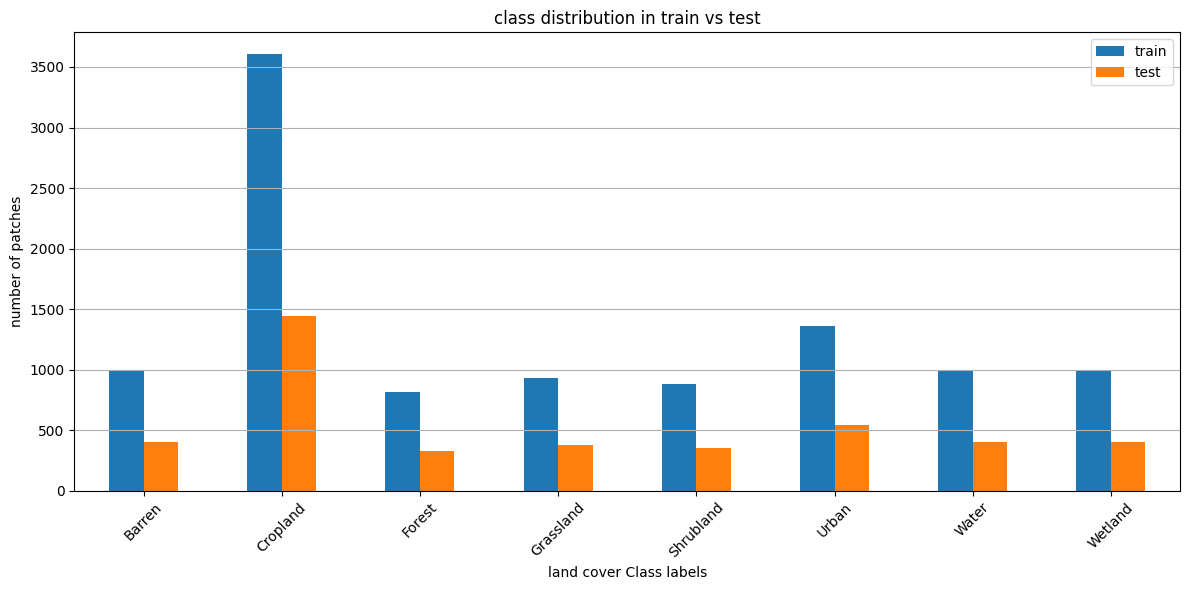

In [39]:
updated_train_counts = full_df["label"].value_counts().sort_index()
print(updated_train_counts)
combined_df = pd.DataFrame({
    'train': updated_train_counts,
    'test': test_counts  # test remains unchanged
})
combined_df.plot(kind="bar", figsize=(12, 6))
plt.title("class distribution in train vs test")
plt.xlabel("land cover Class labels")
plt.ylabel("number of patches")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


talking about class distrubution:

Train:
 label        Count
 Barren          2
 Cropland     3606
 Forest        281
 Grassland     101
 Shrubland     177
 Urban        1357
 Water           4
 Wetland         1

 Test:
 label       Count
 Barren          1
 Cropland     2404
 Forest        188
 Grassland      68
 Shrubland     118
 Urban         904
 Water           3
 Wetland         1

 Misses images for few classes from esa classes in total.  

 Class imbalance can be seen as Cropland, Urban has majority patches 
 covered followed by Forest, Grassland and Shrubland and the least count
 for Barren, Water, Wetland


To handle this data augmentation can be done to increase the number of samples of classes with less samples


In [ ]:
!pip install pandas torchvision pillow


In [69]:
# Train a CNN

import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from PIL import Image

# config

img_dir = '/kaggle/input/earth-observation-delhi-airshed/rgb'
num_classes = 8
img_size=128
batch_size=64
epochs=5
device='cpu'

class_names = sorted(df['label'].unique())
class_names

['Barren',
 'Cropland',
 'Forest',
 'Grassland',
 'Shrubland',
 'Urban',
 'Water',
 'Wetland']

In [46]:
label_to_idx = {label: idx for idx, label in enumerate(class_names)}
label_to_idx

{'Barren': 0,
 'Cropland': 1,
 'Forest': 2,
 'Grassland': 3,
 'Shrubland': 4,
 'Urban': 5,
 'Water': 6,
 'Wetland': 7}

In [67]:
train_df['label_idx'] = train_df['label'].map(label_to_idx)
test_df['label_idx'] = test_df['label'].map(label_to_idx)

transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor()
])

from PIL import Image

class PatchDataset(Dataset):
    def __init__(self, df, data_dirs, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform
        self.data_dirs = data_dirs  # List of directories to look for files
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        filename = self.df.loc[idx, "filename"]
        label = self.df.loc[idx, "label_idx"]
        
        # Search for the file in the provided directories
        file_path = None
        
        # Try the filename as-is first
        for d in self.data_dirs:
            possible_path = os.path.join(d, filename)
            if os.path.exists(possible_path):
                file_path = possible_path
                break
        
        # If not found and filename ends with .png.npy, try with just .png
        if file_path is None and filename.endswith('.png.npy'):
            png_filename = filename.replace('.png.npy', '.png')
            for d in self.data_dirs:
                possible_path = os.path.join(d, png_filename)
                if os.path.exists(possible_path):
                    file_path = possible_path
                    filename = png_filename  # Update filename for loading logic
                    break
        
        # If still not found and filename ends with .npy, try with .png
        if file_path is None and filename.endswith('.npy') and not filename.endswith('.png.npy'):
            png_filename = filename.replace('.npy', '.png')
            for d in self.data_dirs:
                possible_path = os.path.join(d, png_filename)
                if os.path.exists(possible_path):
                    file_path = possible_path
                    filename = png_filename  # Update filename for loading logic
                    break
        
        if file_path is None:
            # Debug: Print available files in directories
            print(f"Could not find: {self.df.loc[idx, 'filename']}")
            for d in self.data_dirs:
                if os.path.exists(d):
                    files = os.listdir(d)[:5]  # Show first 5 files
                    print(f"Files in {d}: {files}")
            raise FileNotFoundError(f"{self.df.loc[idx, 'filename']} not found in any data directories: {self.data_dirs}")
        
        # Load the file
        if filename.endswith('.npy'):
            # Load numpy patch
            np_patch = np.load(file_path)  # shape e.g. (H, W, C)
            # Convert numpy array to PIL Image
            if np_patch.dtype != np.uint8:
                # If float type, convert 0-1 float to 0-255 uint8
                np_patch = (np_patch * 255).clip(0, 255).astype(np.uint8)
            # Ensure we have 3 channels for RGB
            if len(np_patch.shape) == 3 and np_patch.shape[2] == 3:
                pil_image = Image.fromarray(np_patch)
            else:
                # Handle different array shapes
                if len(np_patch.shape) == 2:  # Grayscale
                    pil_image = Image.fromarray(np_patch).convert('RGB')
                else:
                    pil_image = Image.fromarray(np_patch[:,:,:3])  # Take first 3 channels
            image = pil_image
        else:
            # Load normal image (e.g. PNG)
            image = Image.open(file_path).convert("RGB")
        
        # Apply transforms (resize, tensor, normalization, etc)
        if self.transform:
            image = self.transform(image)
        
        return image, label

rgb = '/kaggle/input/earth-observation-delhi-airshed/rgb'

augmented_dir_new = "/kaggle/working/augmented_patches_new"

data_dirs = [rgb, augmented_dir_new]

train_dataset = PatchDataset(train_df, data_dirs=data_dirs, transform=transform)
test_dataset = PatchDataset(test_df, data_dirs=data_dirs, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


len(train_loader), len(test_loader)

(100, 67)

In [48]:
import torch.nn as nn
import torch.optim as optim

model = models.resnet18(weights=None)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


In [70]:
for epoch in range(epochs):
    model.train()
    running_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    acc = correct / total * 100
    print(f"Epoch [{epoch+1}/{epochs}] Loss: {running_loss/total:.4f} | Accuracy: {acc:.2f}%")

Epoch [1/5] Loss: 0.2780 | Accuracy: 91.09%
Epoch [2/5] Loss: 0.2848 | Accuracy: 90.65%
Epoch [3/5] Loss: 0.2234 | Accuracy: 92.69%
Epoch [4/5] Loss: 0.2483 | Accuracy: 91.95%
Epoch [5/5] Loss: 0.2687 | Accuracy: 91.37%


In [71]:
def f1_score(y_true, y_pred, class_names, label_to_idx, epsilon=1e-7):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    f1_scores = []

    for cls in class_names:
        cls_idx = label_to_idx[cls]

        true_pos = np.sum((y_true == cls_idx) & (y_pred == cls_idx))
        false_pos = np.sum((y_true != cls_idx) & (y_pred == cls_idx))
        false_neg = np.sum((y_true == cls_idx) & (y_pred != cls_idx))

        precision = true_pos / (true_pos + false_pos + epsilon)
        recall = true_pos / (true_pos + false_neg + epsilon)

        if precision + recall == 0:
            f1 = 0.0
        else:
            f1 = 2 * precision * recall / (precision + recall + epsilon)

        f1_scores.append(f1)

    mean_f1 = np.mean(f1_scores)
    return mean_f1, f1_scores


In [72]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

num_classes = len(class_names)
macro_f1, per_class_f1 = f1_score(all_labels, all_preds, class_names, label_to_idx)

print(f"Macro F1 Score: {macro_f1:.4f}")
for idx, score in enumerate(per_class_f1):
    print(f"{class_names[idx]} F1: {score:.4f}")


Macro F1 Score: 0.6901
Barren F1: 0.9901
Cropland F1: 0.7026
Forest F1: 0.5711
Grassland F1: 0.8624
Shrubland F1: 0.7534
Urban F1: 0.5971
Water F1: 0.0441
Wetland F1: 1.0000


In [73]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.10.19
    Uninstalling nvidia-curand-cu12-

In [77]:
from torchmetrics.classification import MulticlassF1Score

model.eval()
f1_metric = MulticlassF1Score(num_classes=num_classes, average=None).to(device)
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        preds = outputs.argmax(dim=1)

        all_preds.append(preds)
        all_labels.append(labels)


all_preds = torch.cat(all_preds)
all_labels = torch.cat(all_labels)
per_class_f1 = f1_metric(all_preds, all_labels)
print("TorchMetrics Per-Class F1 Scores:")
for idx, score in enumerate(per_class_f1):
    print(f"{class_names[idx]} F1: {score.item():.4f}")


TorchMetrics Per-Class F1 Scores:
Barren F1: 0.9901
Cropland F1: 0.7026
Forest F1: 0.5711
Grassland F1: 0.8624
Shrubland F1: 0.7534
Urban F1: 0.5971
Water F1: 0.0441
Wetland F1: 1.0000


<Figure size 1000x800 with 0 Axes>

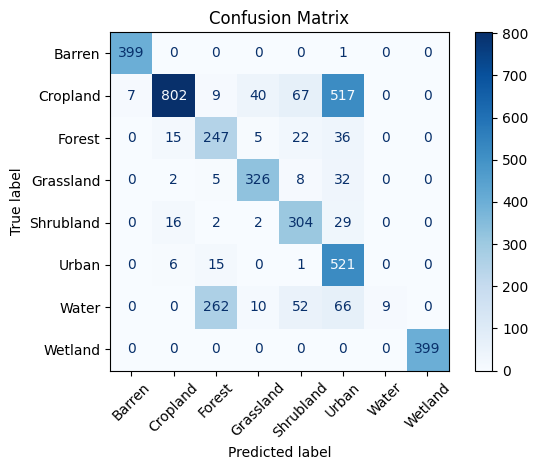

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = all_labels.cpu().numpy()
y_pred = all_preds.cpu().numpy()

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()

In [80]:
def load_image_from_dirs(filename, data_dirs):
    for d in data_dirs:
        file_path = os.path.join(d, filename)
        if os.path.exists(file_path):
            if filename.endswith(".npy"):
                np_patch = np.load(file_path)
                if np_patch.dtype != np.uint8:
                    np_patch = (np_patch * 255).astype(np.uint8)
                return Image.fromarray(np_patch)
            else:
                return Image.open(file_path).convert("RGB")
    raise FileNotFoundError(f"{filename} not found in any of: {data_dirs}")


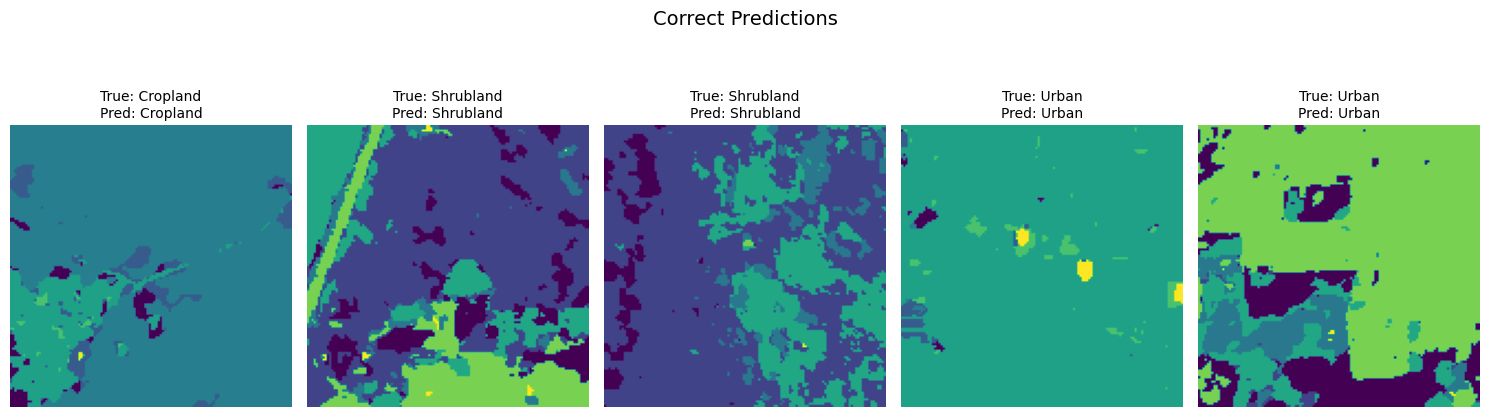

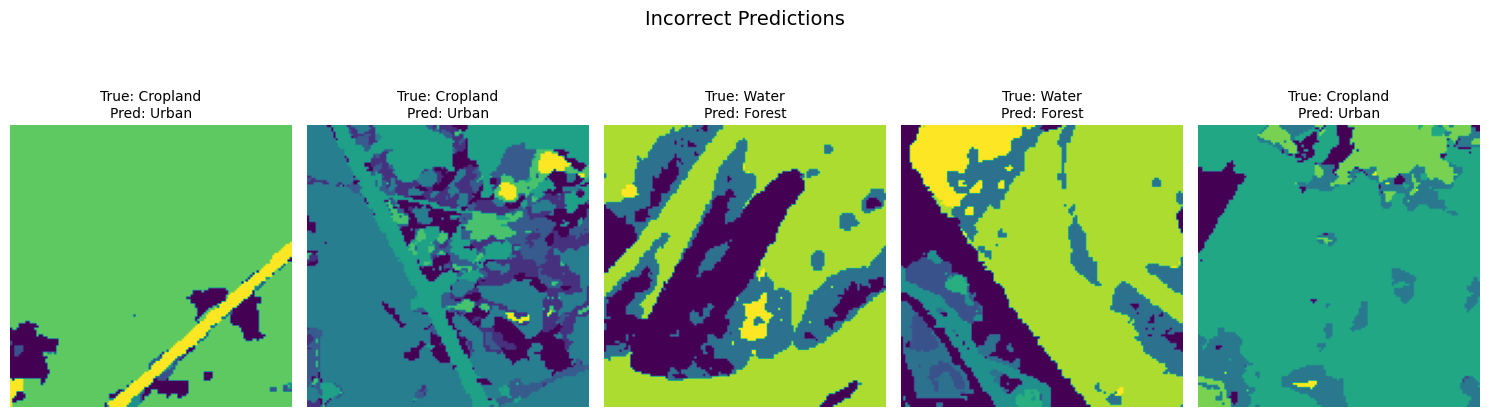

In [82]:
patches='/kaggle/working/patches'
data_dirs = [patches, augmented_dir_new]


test_df = test_df.reset_index(drop=True)

test_df["pred_idx"] = all_preds.cpu().numpy()
test_df["true_idx"] = all_labels.cpu().numpy()
test_df["correct"] = test_df["pred_idx"] == test_df["true_idx"]

idx_to_label = {idx: label for label, idx in label_to_idx.items()}
test_df["true_label"] = test_df["true_idx"].map(idx_to_label)
test_df["pred_label"] = test_df["pred_idx"].map(idx_to_label)

correct_samples = test_df[test_df["correct"]].sample(5, random_state=42)
incorrect_samples = test_df[~test_df["correct"]].sample(5, random_state=42)

plt.figure(figsize=(15, 5))
for i, row in enumerate(correct_samples.itertuples()):
    try:
        img = load_image_from_dirs(row.filename, data_dirs)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"True: {row.true_label}\nPred: {row.pred_label}", fontsize=10)
    except FileNotFoundError as e:
        print(e)

plt.suptitle("Correct Predictions", fontsize=14)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for i, row in enumerate(incorrect_samples.itertuples()):
    try:
        img = load_image_from_dirs(row.filename, data_dirs)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"True: {row.true_label}\nPred: {row.pred_label}", fontsize=10)
    except FileNotFoundError as e:
        print(e)

plt.suptitle("Incorrect Predictions", fontsize=14)
plt.tight_layout()
plt.show()